In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/github-programming-languages-data/issues.csv
/kaggle/input/github-programming-languages-data/prs.csv
/kaggle/input/github-programming-languages-data/repos.csv


## Load Data ##

In [2]:
df = pd.read_csv('/kaggle/input/github-programming-languages-data/prs.csv')
df.head()

,name,year,quarter,count
0,Ruby,2011,3,632
1,PHP,2011,3,484
2,Python,2011,3,423
3,JavaScript,2011,3,367
4,Java,2011,3,216


## Analyze Data Set ##

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3462 entries, 0 to 3461
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     3462 non-null   object
 1   year     3462 non-null   int64 
 2   quarter  3462 non-null   int64 
 3   count    3462 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 108.3+ KB


In [4]:
df.describe()

,year,quarter,count
count,3462.000000,3462.000000,3462.000000
mean,2017.013576,2.502022,11131.740901
std,2.552447,1.122835,34686.780996
min,2011.000000,1.000000,100.000000
25%,2015.000000,1.000000,230.000000
50%,2017.000000,2.000000,616.500000
75%,2019.000000,4.000000,3380.500000
max,2022.000000,4.000000,397530.000000


In [5]:
languages = df['name'].unique()
print(f'There are {len(languages)} unique languages in the data set.')
languages

There are 187 unique languages in the data set.


array(['Ruby', 'PHP', 'Python', 'JavaScript', 'Java', 'C++', 'C', 'Shell',
       'C#', 'Objective-C', 'Scala', 'Erlang', 'HTML', 'Haskell',
       'Groovy', 'TypeScript', 'CoffeeScript', 'Go', 'Lua', 'Perl',
       'ColdFusion', 'Emacs Lisp', 'CSS', 'Clojure', 'Objective-J',
       'Elixir', 'Web Ontology Language', 'Puppet', 'XSLT', 'Vim script',
       'nesC', 'Nix', 'VimL', 'Delphi', 'Scheme', 'Jupyter Notebook',
       'TSQL', 'Common Lisp', 'Pascal', 'SQF', 'DM', 'Kotlin', 'OCaml',
       'Julia', 'Smalltalk', 'PowerShell', 'ActionScript', 'Dart', 'Vala',
       'Haxe', 'Swift', 'Raku', 'Rust', 'Makefile', 'TeX', 'R',
       'Assembly', 'Mako', 'D', 'Fortran', 'F#', 'Logos', 'PLSQL',
       'CMake', 'Apex', 'QML', 'Objective-C++', 'Pan', 'Tcl', 'Liquid',
       'SQLPL', 'Racket', 'SQL', 'Vim Snippet',
       'Common Workflow Language', 'Eagle', 'Protocol Buffer',
       'Standard ML', 'SCSS', 'XQuery', 'Dockerfile',
       'GCC Machine Description', 'PLpgSQL', 'Xtend', 'Matlab',


## 

## Group data based on Programming Language name and year ##

In [6]:
name_and_year = df.groupby(['name','year'])
sum_counts = name_and_year['count'].sum().reset_index().sort_values('count', ascending=False)
sum_counts.head(25)

,name,year,count
415,JavaScript,2016,1479882
416,JavaScript,2017,1477140
715,Python,2017,970465
414,JavaScript,2015,841002
417,JavaScript,2018,826691
419,JavaScript,2020,817650
718,Python,2020,809805
714,Python,2016,798616
418,JavaScript,2019,787866
717,Python,2019,770913


## Make some assumptions and determine how to find the truth in the data ##

We can see in the chart above that JavaScript is consistently the most used programming language for Pull Requests on GitHub as far back as 2016. The close runner ups are Python and Java. Interestingly, we don't have any contenders from the years before JavaScript and Python became popularized among developers. I believe this might be due to the fact that as time passed overall Pull Requests increased significantly. If we look farther back in time we might see a different set of languages that were popular before JavaScript and Python reigned supreme. I can confirm these assumptions and get more info by visualizing the following data

- Top 8 Programming Languages by # of GitHub Pull Requests
- Top 8 Programming Languages by # of GitHub Pull Requests before 2013
- Number of Pull Requests per year

## Import Visualization Packages ##

In [7]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Plot the data ##
### Top 8 Programming Languages by # of GitHub Pull Requests ###

<AxesSubplot:xlabel='year', ylabel='count'>

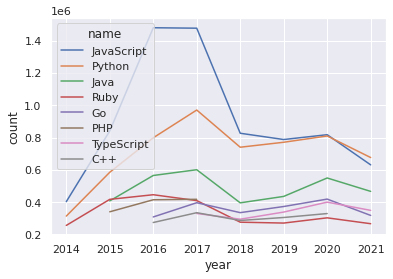

In [8]:
sns.lineplot(data=sum_counts.head(50), x='year',y='count',hue='name')

## Clean up the plot ##
### Top 8 Programming Languages by # of GitHub Pull Requests ### 

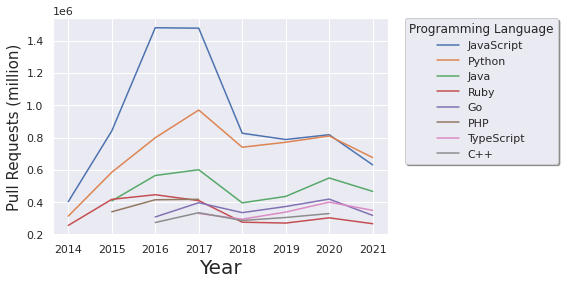

In [9]:
plot = sns.lineplot(data=sum_counts.head(50), x='year',y='count',hue='name')

# Set labels of x and y axis
plot.set_xlabel('Year',fontsize=20)
plot.set_ylabel('Pull Requests (million)',fontsize=15)

# Put the legend out of the figure
# Reference - https://stackoverflow.com/a/34579525
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,shadow=True,title='Programming Language')


## Plot the data ##
### Top 8 Programming Languages by # of GitHub Pull Requests before 2013 ###

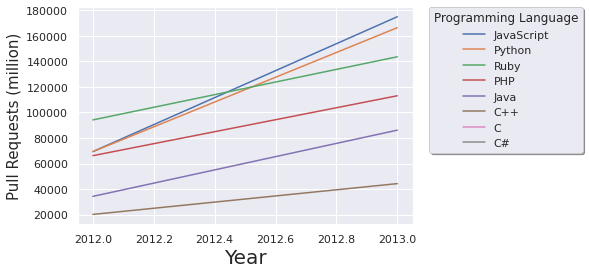

In [10]:
# We'll handle styling in the same code snippet this time
before_13 = sum_counts.query('year <= 2013').head(14)
plot_before_13 = sns.lineplot(data=before_13, x='year',y='count',hue='name')

# Set labels of x and y axis
plot_before_13.set_xlabel('Year',fontsize=20)
plot_before_13.set_ylabel('Pull Requests (million)',fontsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,shadow=True,title='Programming Language')

## Gather and Plot the data ##
### Pull Requests by year ###

In [11]:
pr_by_year = df.groupby(['year'])['count'].sum().reset_index().sort_values('count', ascending=False)
pr_by_year.head(10)

,year,count
6,2017,6636621
5,2016,5987402
9,2020,5055278
8,2019,4637549
7,2018,4511395
10,2021,4144760
4,2015,4112878
3,2014,2048373
2,2013,952269
1,2012,430350


It looks like our hypothesis might be wrong. Let's plot it!

Text(0.5, 0, 'Year')

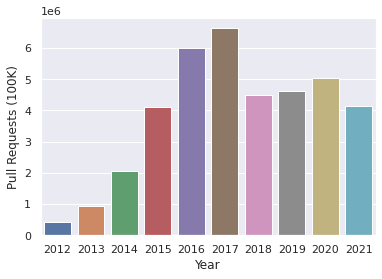

In [12]:
# Excluded 2011 and 2022 due to lack of data
plot_annual_pr = sns.barplot(data=pr_by_year.query('year < 2022 & year > 2011'),x='year',y='count')
plot_annual_pr.set_ylabel('Pull Requests (100K)')
plot_annual_pr.set_xlabel('Year')

## Conclusion ##
We found that Ruby was indeed more popular than Python and JavaScript up until about mid 2012.
Our hypothesis about pull requests continually increasing over time was wrong. There seems to be a peak in 2016 & 2018 and a sudden drop in 2018 that hasn't quite picked back up yet. 

### The most important insight gained ###
The increase in Pull Requests from 2019 to 2020 is clearly a result of [Joe Biden telling Coal Miners that they should learn how to code](https://www.youtube.com/watch?v=VDRK0MyuuIM) 